In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
### build the dataset
#This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T =10
D =1
X=[]
Y=[]

def get_label(x,i1,i2,i3):
   # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(50):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,-1,-2,-3) # short distance
    # y = get_label(x,0,1,2)  # longe distance
  Y.append(y)

X= np.array(X)
Y= np.array(Y)
N= len(X)

In [5]:
[X.shape,
 Y.shape]

[(50, 10), (50,)]

In [6]:
'''print(X[20],Y[0],'\n')
#print(X[-1],Y[-1])
#set(Y)
np.where(X>0)
X[np.isin(np.arange(5000),np.where(X<0))]'''

[ 0.79762409  0.15366333  0.98365719  1.2326086   0.08005552 -0.68394583
 -1.27996504 -0.64152938 -0.13755706  2.01999023] 0 



'np.where(X>0)\nX[np.isin(np.arange(5000),np.where(X<0))]'

In [ ]:
# Try a linear model firts - note: it is classification now!
i = Input(shape=(T,))
x= Dense(1,activation='sigmoid')(i)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

#train the network
r = model.fit(
    X,Y,
    epochs =100,
    validation_split=0.5,
)



Epoch 1/100
79/79 [==============================] - 0s 5ms/step - loss: 0.7790 - accuracy: 0.5072 - val_loss: 0.7111 - val_accuracy: 0.5028
Epoch 2/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6975 - accuracy: 0.5076 - val_loss: 0.6934 - val_accuracy: 0.5092
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.5016 - val_loss: 0.6950 - val_accuracy: 0.4888
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.4968 - val_loss: 0.6947 - val_accuracy: 0.5056
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.4944 - val_loss: 0.6949 - val_accuracy: 0.5016
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.4872 - val_loss: 0.6947 - val_accuracy: 0.4864
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6967 - accuracy: 0.4940 - val_loss: 0.6958 - val_accuracy: 0.5108
Epoch 8/100
7

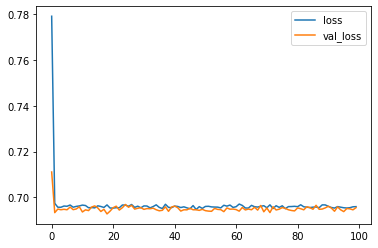

In [ ]:
#plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

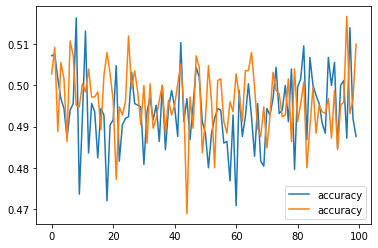

In [ ]:
#Plot the accuracy too- should be around 50%
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='accuracy')
plt.legend()
plt.show()

In [ ]:
# Now try a simple RNN
inputs = np.expand_dims(X,-1)

#make the RNN
i = Input(shape=(T,D))

#method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

#method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model=Model(i,x)
model.compile(
    loss='binary_crossentropy',
    #optimizer='rmsprop',
    # optimizer='adam',
    optimizer=Adam(lr=0.01),
    #optimizer=SGD(lr=0.1,momentum=0.9),
    metrics=['accuracy']
)

In [ ]:
#train the RNN
r = model.fit(
    inputs,Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6941 - accuracy: 0.5196 - val_loss: 0.6757 - val_accuracy: 0.5772
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6513 - accuracy: 0.6488 - val_loss: 0.6236 - val_accuracy: 0.6824
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.5654 - accuracy: 0.7656 - val_loss: 0.5082 - val_accuracy: 0.8192
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.4554 - accuracy: 0.8384 - val_loss: 0.4074 - val_accuracy: 0.8672
Epoch 5/200
79/79 [==============================] - 1s 10ms/step - loss: 0.3719 - accuracy: 0.8656 - val_loss: 0.3328 - val_accuracy: 0.8892
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.3110 - accuracy: 0.8864 - val_loss: 0.2816 - val_accuracy: 0.9120
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.2727 - accuracy: 0.9028 - val_loss: 0.2414 - val_accuracy: 0.9248
Epoch 

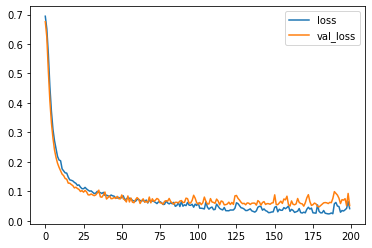

In [ ]:
#plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

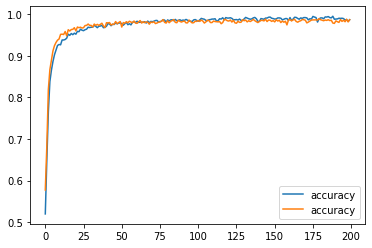

In [ ]:
#Plot the accuracy too- should be around 50%
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='accuracy')
plt.legend()
plt.show()

In [ ]:
# Now chanfe to the long distance problem

# Start with a small T and increase it Scalar
T =10
D= 1
X= []
Y= []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,0,1,2) # long distance
  Y.append(y)

X = np.array(X)
Y= np.array(Y)
N = len(X)

In [ ]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)


Epoch 1/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6974 - accuracy: 0.4956 - val_loss: 0.6948 - val_accuracy: 0.5020
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5180 - val_loss: 0.6902 - val_accuracy: 0.5404
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6911 - accuracy: 0.5300 - val_loss: 0.6923 - val_accuracy: 0.5208
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6910 - accuracy: 0.5400 - val_loss: 0.6841 - val_accuracy: 0.5664
Epoch 5/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6879 - accuracy: 0.5596 - val_loss: 0.6814 - val_accuracy: 0.5872
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6814 - accuracy: 0.5716 - val_loss: 0.6771 - val_accuracy: 0.5956
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6773 - accuracy: 0.5884 - val_loss: 0.6763 - val_accuracy: 0.5932
Epoch 

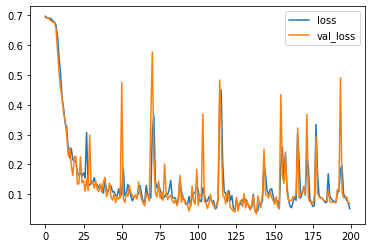

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

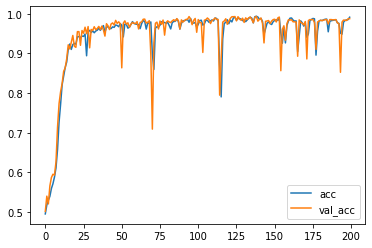

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now test out LSTM
inputs = np.expand_dims(X,-1)
inputs.shape

(5000, 10, 1)

In [ ]:
#make the RNN
i = Input(shape=(T,D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation ='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
    )

#train the RNN
r=model.fit(
    inputs,Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6946 - accuracy: 0.4876 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5176 - val_loss: 0.6947 - val_accuracy: 0.4912
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.5048 - val_loss: 0.6944 - val_accuracy: 0.5052
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.5208 - val_loss: 0.6947 - val_accuracy: 0.4948
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5092 - val_loss: 0.6947 - val_accuracy: 0.4964
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5068 - val_loss: 0.6950 - val_accuracy: 0.5012
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5176 - val_loss: 0.6951 - val_accuracy: 0.4984
Epoch 8/200


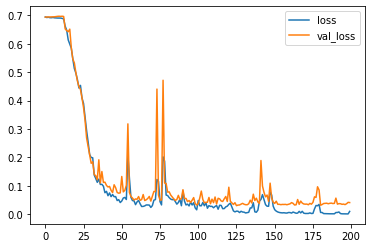

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

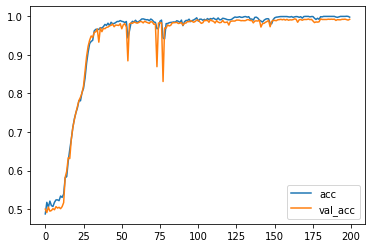

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6986 - accuracy: 0.5156 - val_loss: 0.6948 - val_accuracy: 0.5092
Epoch 2/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6944 - accuracy: 0.5080 - val_loss: 0.6940 - val_accuracy: 0.5104
Epoch 3/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6926 - accuracy: 0.5300 - val_loss: 0.6969 - val_accuracy: 0.5096
Epoch 4/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6916 - accuracy: 0.5296 - val_loss: 0.6936 - val_accuracy: 0.5172
Epoch 5/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6917 - accuracy: 0.5264 - val_loss: 0.6976 - val_accuracy: 0.5064
Epoch 6/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6912 - accuracy: 0.5456 - val_loss: 0.6973 - val_accuracy: 0.5032
Epoch 7/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6915 - accuracy: 0.5336 - val_loss: 0.6971 - val_accuracy: 0.5176
Epoch 

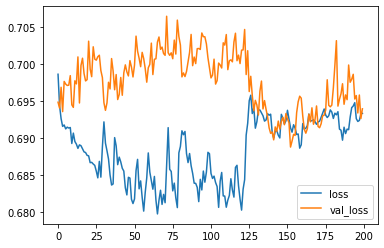

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

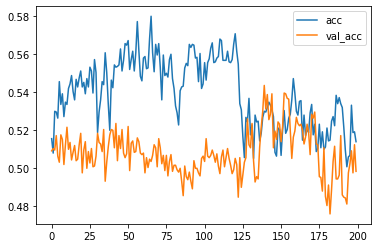

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6918 - val_accuracy: 0.5168
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5132 - val_loss: 0.6920 - val_accuracy: 0.5124
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5072 - val_loss: 0.6919 - val_accuracy: 0.5128
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5084 - val_loss: 0.6915 - val_accuracy: 0.5168
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5108 - val_loss: 0.6916 - val_accuracy: 0.5192
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5104 - val_loss: 0.6925 - val_accuracy: 0.5124
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.5060 - val_loss: 0.6914 - val_accuracy: 0.5188
Epoch 8/200


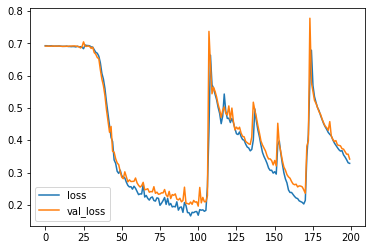

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

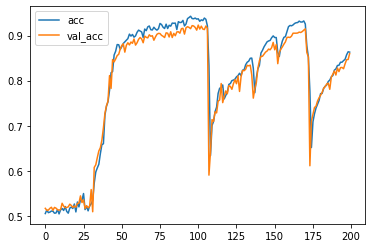

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
#Now test our GRU
inputs = np.expand_dims(X,-1)

#make the RNN
i = Input(shape=(T,D))

#method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

#train the RNN
r = model.fit(
    inputs,Y,
    epochs=400,
    validation_split=0.5
)

Epoch 1/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6954 - accuracy: 0.5088 - val_loss: 0.6926 - val_accuracy: 0.5216
Epoch 2/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.5144 - val_loss: 0.6919 - val_accuracy: 0.5164
Epoch 3/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5024 - val_loss: 0.6931 - val_accuracy: 0.5112
Epoch 4/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5128 - val_loss: 0.6915 - val_accuracy: 0.5064
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5264 - val_loss: 0.6941 - val_accuracy: 0.5056
Epoch 6/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.5108 - val_loss: 0.6917 - val_accuracy: 0.5160
Epoch 7/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5152 - val_loss: 0.6924 - val_accuracy: 0.5056
Epoch 8/400


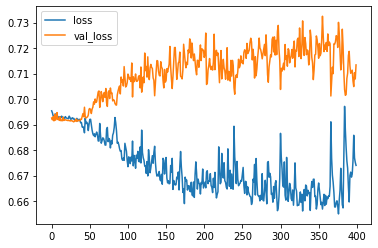

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

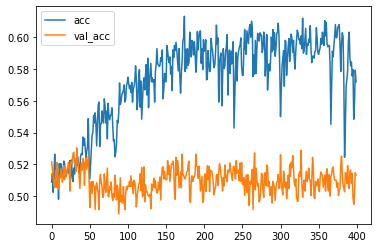

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6946 - accuracy: 0.5012 - val_loss: 0.6941 - val_accuracy: 0.4932
Epoch 2/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.5096 - val_loss: 0.6937 - val_accuracy: 0.4920
Epoch 3/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.5200 - val_loss: 0.6932 - val_accuracy: 0.4936
Epoch 4/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5148 - val_loss: 0.6969 - val_accuracy: 0.4948
Epoch 5/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6930 - accuracy: 0.5180 - val_loss: 0.6951 - val_accuracy: 0.4976
Epoch 6/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5220 - val_loss: 0.6941 - val_accuracy: 0.5008
Epoch 7/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5184 - val_loss: 0.6959 - val_accuracy: 0.5004
Epoch 8/400


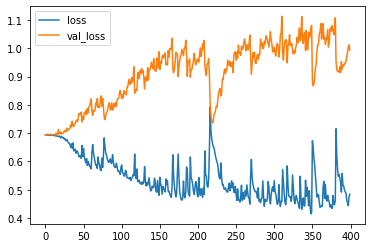

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

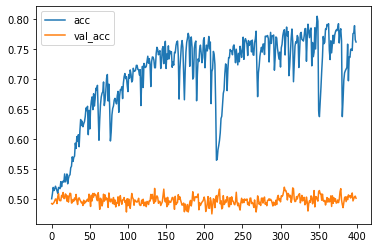

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
#Now try a LSTM with Global Max Pooling
inputs=np.expand_dims(X,-1)

#make the RNN
i = Input(shape=(T,D))

#method 2
x = LSTM(5,return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

#train the RNN
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6937 - accuracy: 0.5092 - val_loss: 0.6944 - val_accuracy: 0.5020
Epoch 2/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6919 - accuracy: 0.5328 - val_loss: 0.6949 - val_accuracy: 0.5088
Epoch 3/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6922 - accuracy: 0.5376 - val_loss: 0.6972 - val_accuracy: 0.5024
Epoch 4/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6913 - accuracy: 0.5316 - val_loss: 0.6919 - val_accuracy: 0.5364
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5568 - val_loss: 0.6935 - val_accuracy: 0.5148
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6839 - accuracy: 0.5560 - val_loss: 0.6844 - val_accuracy: 0.5480
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6700 - accuracy: 0.5808 - val_loss: 0.6704 - val_accuracy: 0.5832
Epoch 8/100


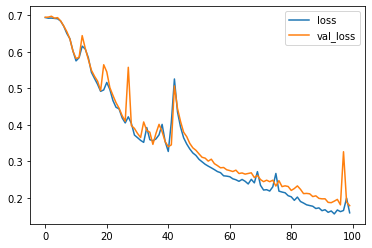

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

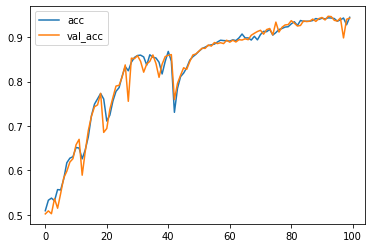

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()